# Personality Prediction

In [13]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from plotly.offline import iplot
import cufflinks as cf
import sheryanalysis as sh 
import warnings 
warnings.filterwarnings('ignore')
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl')

In [14]:
df=pd.read_csv("personality_datasert.csv")

In [25]:
from IPython.display import display, Markdown
import pandas as pd

def smart_overview(df):
    # 1. Basic Info Header
    display(Markdown(f"### 📊 Dataset Shape: {df.shape[0]} Rows, {df.shape[1]} Columns"))
    
    # 2. Check Duplicates
    dup_count = df.duplicated().sum()
    if dup_count > 0:
        display(Markdown(f"⚠️ **Warning:** Found {dup_count} duplicated rows!"))
    else:
        display(Markdown("✅ No duplicated rows found."))

    # 3. Create a Custom Summary DataFrame (Sab kuch ek jagah)
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df)) * 100,
        'Unique Values': df.nunique(),
        'Duplicates (in col)': [df[col].duplicated().sum() for col in df.columns] 
    })
    
    # Thoda styling taaki missing values highlight ho jayein
    display(Markdown("🔍 Column-wise Analysis:"))
    
    # Ye table display karega jisme Missing % High ho, wo highlight hoga (Gradient Style)
    display(summary.style.background_gradient(cmap='Reds', subset=['Unique Values']))

    # 4. Head (Preview)
    display(Markdown("### 👀 First 5 Rows:"))
    display(df.head())

    # 5. Statistical Description (Transpose karke clean view)
    display(Markdown("### 📈 Statistical Summary:"))
    display(df.describe(include='all').T)

smart_overview(df)

### 📊 Dataset Shape: 2900 Rows, 8 Columns

⚠️ **Warning:** Found 402 duplicated rows!

🔍 Column-wise Analysis:

,Data Type,Missing Values,Missing %,Unique Values,Duplicates (in col)
Time_spent_Alone,float64,0,0.000000,13,2887
Stage_fear,object,0,0.000000,2,2898
Social_event_attendance,float64,0,0.000000,12,2888
Going_outside,float64,0,0.000000,8,2892
Drained_after_socializing,object,0,0.000000,2,2898
Friends_circle_size,float64,0,0.000000,17,2883
Post_frequency,float64,0,0.000000,12,2888
Personality,object,0,0.000000,2,2898


### 👀 First 5 Rows:

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


### 📈 Statistical Summary:

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2900.0,NaN,NaN,NaN,4.505816,3.44118,0.0,2.0,4.0,7.0,11.0
Stage_fear,2900,2,No,1490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Social_event_attendance,2900.0,NaN,NaN,NaN,3.963354,2.872608,0.0,2.0,3.963354,6.0,10.0
Going_outside,2900.0,NaN,NaN,NaN,3.0,2.221597,0.0,1.0,3.0,5.0,7.0
Drained_after_socializing,2900,2,No,1493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Friends_circle_size,2900.0,NaN,NaN,NaN,6.268863,4.23234,0.0,3.0,5.0,10.0,15.0
Post_frequency,2900.0,NaN,NaN,NaN,3.564727,2.893587,0.0,1.0,3.0,6.0,10.0
Personality,2900,2,Extrovert,1491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [39]:
def cols_info(df):
    print("Total Columns : ",len(df.columns))
    numericals_cols=df.select_dtypes(include="number").columns
    categ_cols=df.select_dtypes(include="object").columns
    print("---- Numerical Columns ----")
    for idx,col in enumerate(numericals_cols,0):
        print(f"{idx+1} | {col}")
    print("---- Categorical Columns ----")
    for idx,col in enumerate(categ_cols,0):
        print(f"{idx+1} | {col}")
cols_info(df)
    

Total Columns :  8
---- Numerical Columns ----
1 | Time_spent_Alone
2 | Social_event_attendance
3 | Going_outside
4 | Friends_circle_size
5 | Post_frequency
---- Categorical Columns ----
1 | Stage_fear
2 | Drained_after_socializing
3 | Personality


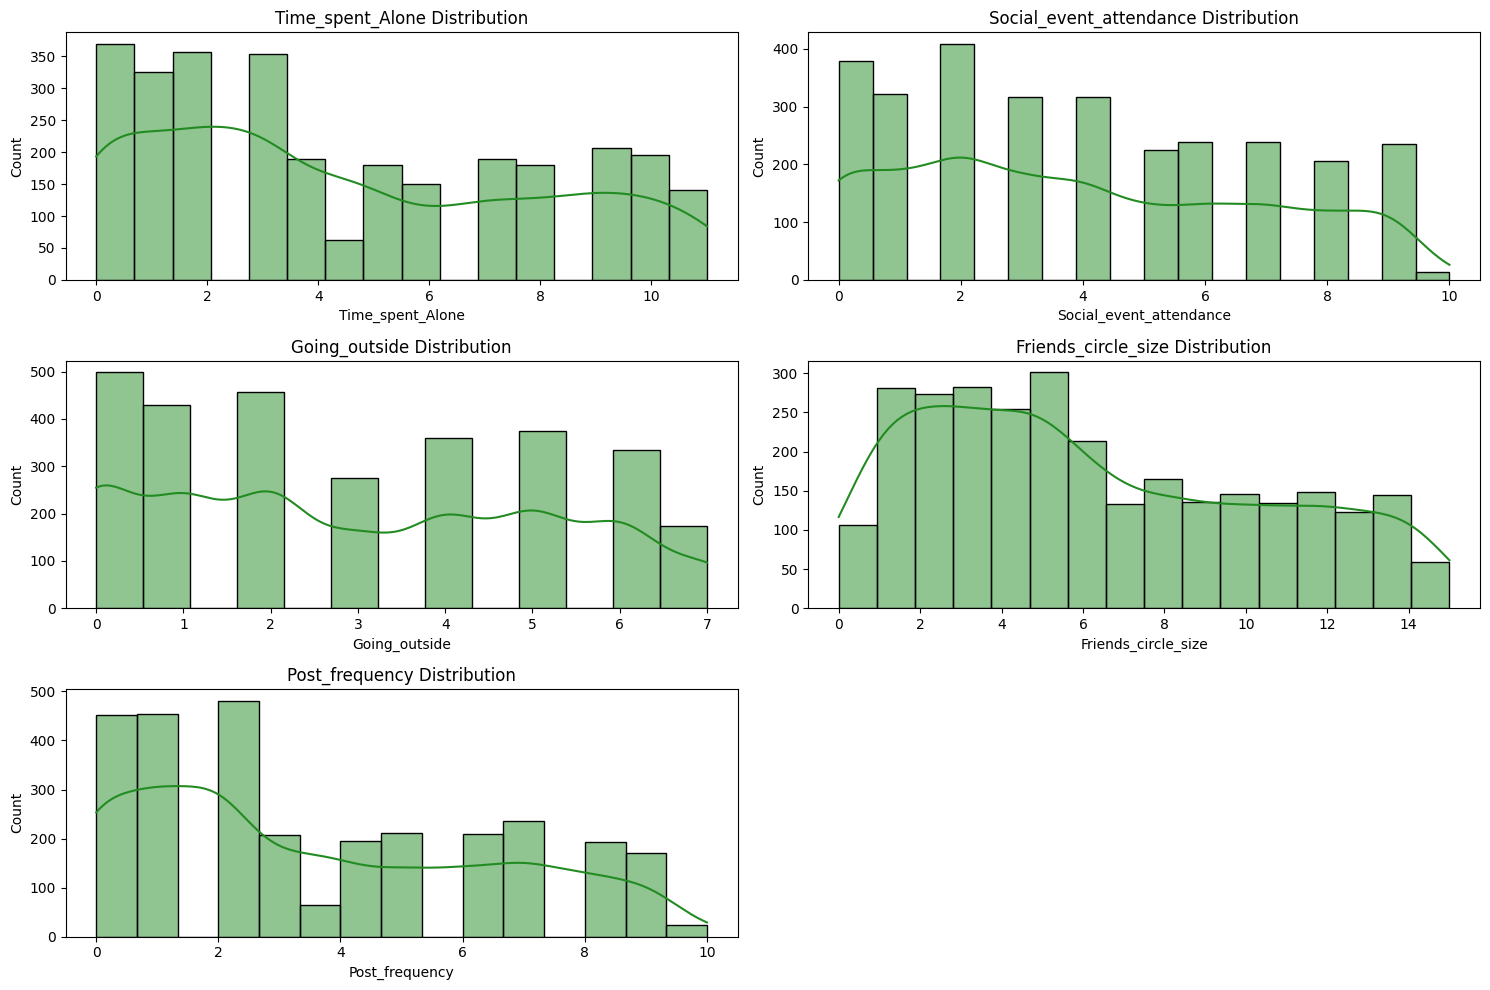

In [63]:
fig,axes=plt.subplots(3,2,figsize=(15,10))
axes=axes.flatten()
for idx,col in enumerate(df.select_dtypes(include='number'),0):
    axes[idx].set_title(f"{col} Distribution")
    sns.histplot(data=df,x=col,ax=axes[idx],color='forestgreen',kde=True)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])
fig.tight_layout()
plt.show()

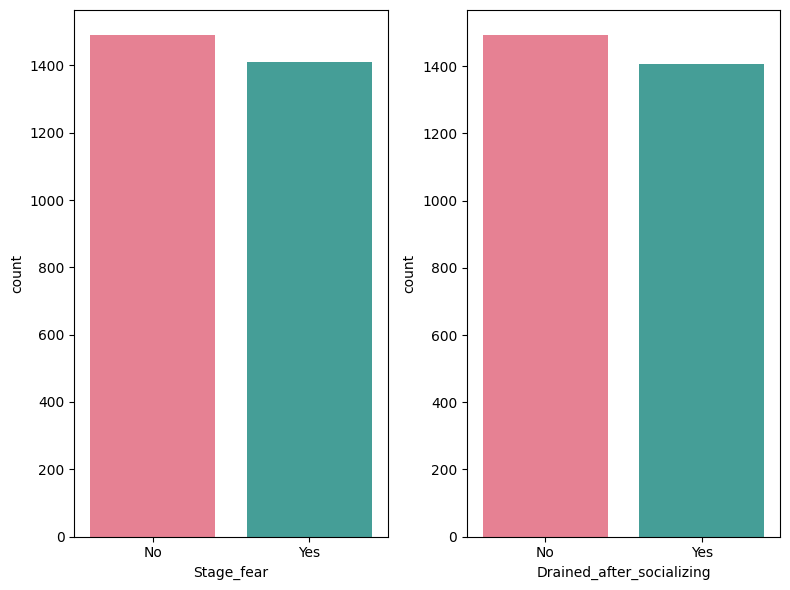


📊 Categorical Value Counts

🔹 Column: Stage_fear
Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64
------------------------------

🔹 Column: Drained_after_socializing
Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64
------------------------------


In [89]:
fig,axes=plt.subplots(1,2,figsize=(8,6))
axes=axes.flatten()
for idx,col in enumerate(df.select_dtypes(include='object'),0):
    sns.countplot(data=df,x=col,ax=axes[idx],palette='husl')
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])
fig.tight_layout()
plt.show()
# 5. Value Counts (Loop mein Clean Print)
print("\n" + "="*40)
print("📊 Categorical Value Counts")
print("="*40)

for col in df.select_dtypes(include='object').columns:
    print(f"\n🔹 Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

In [69]:
df['Personality']=df['Personality'].map({
    'Extrovert':1,
    'Introvert':0
})

In [78]:
df['Personality'].unique()

array([1, 0], dtype=int64)

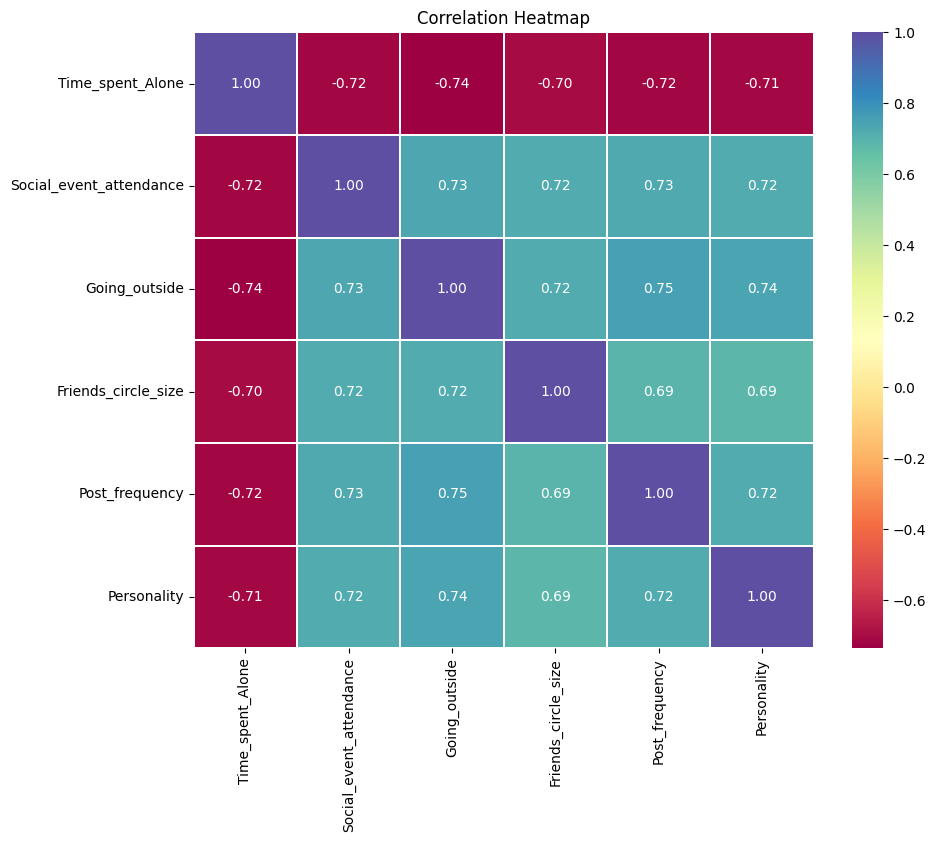

In [77]:
corr_matrix=df.corr(numeric_only='True')
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='Spectral', fmt=".2f",linewidths=1.3)
plt.title("Correlation Heatmap")
plt.show()

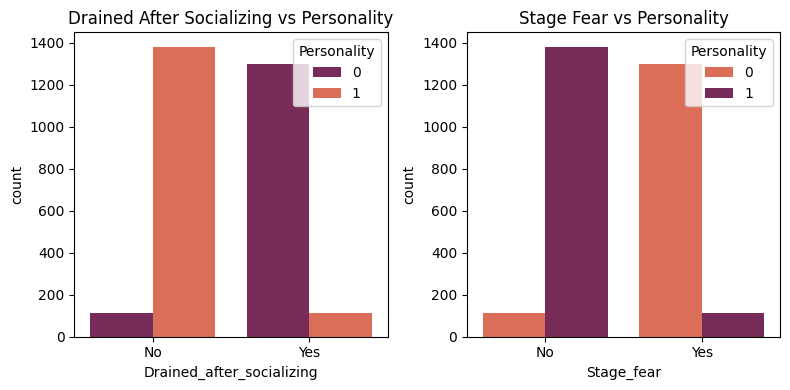

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(data=df, x='Drained_after_socializing', hue='Personality', palette='rocket', ax=axes[0])
axes[0].set_title("Drained After Socializing vs Personality")

sns.countplot(data=df, x='Stage_fear', hue='Personality', palette='rocket_r', ax=axes[1])
axes[1].set_title("Stage Fear vs Personality")

plt.tight_layout()
plt.show()

<Axes: xlabel='Personality', ylabel='Going_outside'>

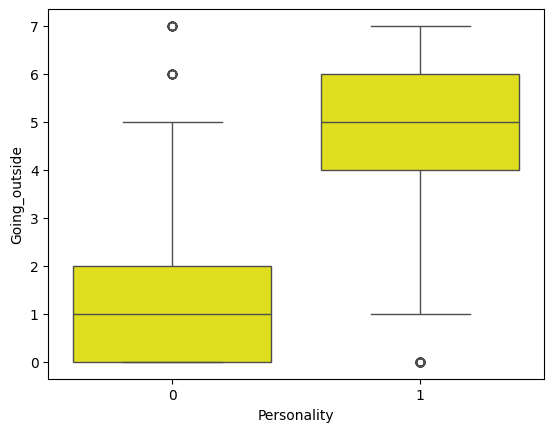

In [108]:
sns.boxplot(x=df['Personality'],y=df['Going_outside'],color='yellow')

<Axes: xlabel='Personality', ylabel='Friends_circle_size'>

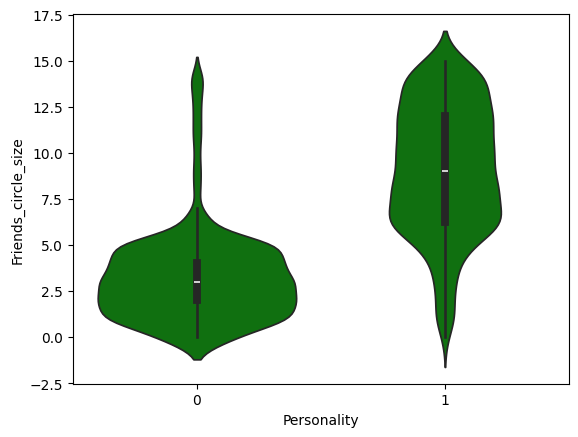

In [111]:
sns.violinplot(x=df['Personality'],y=df['Friends_circle_size'],color='green')

<Axes: xlabel='Personality', ylabel='Post_frequency'>

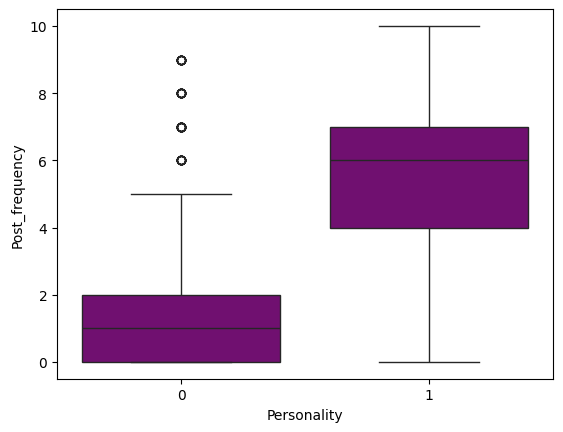

In [114]:
sns.boxplot(x=df['Personality'],y=df['Post_frequency'],color='purple')

In [124]:
def check_outliers(df):
    # Sirf numeric columns lo
    numeric_cols = df.select_dtypes(include='number').columns
    print(f"Column = Total Outliers")
    for col in numeric_cols:
        # 1. Calculate Q1, Q3, IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        # 2. Define Bounds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # 3. Find Outliers (Using | for OR)
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        total_outliers = len(outliers)
        
        print(f"{col} = {total_outliers}")

# Function call
check_outliers(df)

Column = Total Outliers
Time_spent_Alone = 0
Social_event_attendance = 0
Going_outside = 0
Friends_circle_size = 0
Post_frequency = 0
Personality = 0


In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df.duplicated().sum()

0

In [147]:
df_cleaned=pd.get_dummies(data=df,columns=df.select_dtypes(include='object').columns,drop_first=True)
print(df_cleaned.shape)
df_cleaned.head()

(2498, 8)


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,1,False,False
1,9.0,0.0,0.0,0.0,3.0,0,True,True
2,9.0,1.0,2.0,5.0,2.0,0,True,True
3,0.0,6.0,7.0,14.0,8.0,1,False,False
4,3.0,9.0,4.0,8.0,5.0,1,False,False


In [151]:
# 1. Mapping Dictionary banao
binary_map = {'Yes': 1, 'No': 0}

# 2. Map function lagao (Ye 'Yes' ko 1 aur 'No' ko 0 bana dega)
df_cleaned['Drained_after_socializing_Yes'] = df['Drained_after_socializing'].map(binary_map)
df_cleaned['Stage_fear_Yes'] = df['Stage_fear'].map(binary_map)
df_cleaned['Post_frequency']=df['Post_frequency'].astype(int)

# 3. Check karo
print("Conversion Done!")
display(df_cleaned[['Drained_after_socializing_Yes', 'Stage_fear_Yes']].head())

Conversion Done!


,Drained_after_socializing_Yes,Stage_fear_Yes
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0


In [152]:
df_cleaned

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5,1,0,0
1,9.0,0.0,0.0,0.0,3,0,1,1
2,9.0,1.0,2.0,5.0,2,0,1,1
3,0.0,6.0,7.0,14.0,8,1,0,0
4,3.0,9.0,4.0,8.0,5,1,0,0
...,...,...,...,...,...,...,...,...
2894,0.0,9.0,3.0,12.0,3,1,0,0
2896,3.0,8.0,3.0,14.0,9,1,0,0
2897,4.0,1.0,1.0,4.0,0,0,1,1
2898,11.0,1.0,3.0,2.0,0,0,1,1


In [153]:
from sklearn.model_selection import train_test_split
X=df_cleaned.drop(columns='Personality',axis=1,errors='ignore')
y=df_cleaned['Personality']
X_train,X_test,y_train,y_test=train_test_split(
    X,y,random_state=42,shuffle=True,test_size=0.2
)

In [157]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

models={
        'Logistic Regression':LogisticRegression(),
        'knn':KNeighborsClassifier(n_jobs=-1,n_neighbors=5),
        'Decision tree':DecisionTreeClassifier(
            max_depth=5,min_samples_leaf=3,min_samples_split=5
        ),
        'Random Forest':RandomForestClassifier(
            n_estimators=100,bootstrap=True,max_depth=4,oob_score=True,n_jobs=-1
        ),
        'Naive Bayes':GaussianNB(),
        'SVM':SVC(),
        'Xgboost':XGBClassifier(n_estimators=100,n_jobs=-1),
        'Gradient_Boosting':GradientBoostingClassifier()
}


In [158]:
for name,model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Accuracy check
    acc = accuracy_score(y_test, y_pred)
    report=classification_report(y_test,y_pred)
    print(f"--> {name} Accuracy: {acc*100:.2f}%")
    print("Classification Report - \n",report)
    print("-" * 30)

Training Logistic Regression...
--> Logistic Regression Accuracy: 90.60%
Classification Report - 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       221
           1       0.93      0.90      0.91       279

    accuracy                           0.91       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

------------------------------
Training knn...
--> knn Accuracy: 90.60%
Classification Report - 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       221
           1       0.93      0.90      0.91       279

    accuracy                           0.91       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

------------------------------
Training Decision tree...
--> Decision tree Accuracy: 90.60%
Classification Report - 
               precision    reca

In [162]:

# Best Model (Let's say Random Forest)
model = models['Xgboost']
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Convert to Series for easy comparison
y_test_series = y_test.reset_index(drop=True)
y_pred_series = pd.Series(y_pred)

# Wo rows nikalo jahan Galti hui
errors = X_test.reset_index(drop=True)[y_test_series != y_pred_series]
correct_labels = y_test_series[y_test_series != y_pred_series]
predicted_labels = y_pred_series[y_test_series != y_pred_series]

# Create Error DataFrame
error_df = errors.copy()
error_df['Actual'] = correct_labels
error_df['Predicted'] = predicted_labels

print(f"Total Wrong Predictions: {len(error_df)}")
display(error_df.head())

Total Wrong Predictions: 61


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Actual,Predicted
3,9.0,2.0,2.0,1.0,0,1,1,1,0
15,8.0,2.0,2.0,2.0,2,1,1,1,0
21,10.0,0.0,2.0,4.0,1,1,1,1,0
24,2.0,9.0,5.0,13.0,7,0,0,0,1
28,8.0,1.0,2.0,1.0,0,1,1,0,1


In [ ]:
final_model = models['Random Forest']
final_model.fit(X_train, y_train)

# 2. Model ko file mein save karo
joblib.dump(final_model, 'personality_model.pkl')

print("Success! Model saved as 'personality_model.pkl' 💾")

In [171]:
df['Going_outside'].max()

7.0